In [10]:
import torch
from transformers import AlignProcessor, AlignModel
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from src.datasets.meme_text_dataloader import get_meme_text_dataloader
from src.utilities import *
from src.models.align_base import align_base



# Load the dataset and the model

In [2]:
# Load images into a Dataset, but the pixels will be transformed into list elements, which is not efficient.
meme_loader = get_meme_text_dataloader('memecap', (-1, -1))
# meme_loader.load_datasets(0, 10)
# print(meme_loader.dataset)
# print('meme shape:', np.array(meme_loader.dataset['test']['image'][0]).shape)
# visualize_meme(meme_loader.dataset['test']['image'][0], meme_loader.dataset['test']['caption'][0])
# # TODO (maybe?): Verify if the loading process works well, and if every meme gets resized and cropped correctly.

In [4]:
align_model = align_base()

# Inference examples

In [3]:
# Load images from the Internet
import requests
from PIL import Image

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
candidate_labels = ["an image of a cat", "an image of a dog"]

In [8]:
# Example 1
# Expected either PIL.Image.Image, numpy.ndarray, torch.Tensor, tf.Tensor or jax.ndarray, but got <class 'list'>.
result = align_model.forward(candidate_labels, image)
result

tensor([[0.9981, 0.0019]], device='cuda:0')

In [6]:
# Example 2
# Load images from local file system
images = meme_loader.load_images(meme_loader.trainval_text_data[:10])
captions = [i['meme_captions'][0] for i in meme_loader.trainval_text_data[:10]]
captions

['Meme poster is frustrated about the format of the website and is making a suggestion for improvement.',
 'Meme poster is saying that searching Google plus the term you want to search on reddit is better than searching reddit itself.',
 'Meme poster is feeling sad.',
 'Meme poster is saying that Reddit is more fun than Instagram.',
 'Meme poster is making fun of the Area 51 raid.',
 "Meme poster is making fun of Europe's fascination with Area 51.",
 'Meme poster shows what it looks like waiting for a long time.',
 'Meme poster is mad at how slow Reddit is when it comes to uploading content.',
 'Meme poster is making fun of parents when they make a fuss over turning the interior lights in the car on.',
 'Meme poster is happy because his parents are proud of his video game victory.']

In [13]:
# Expected either PIL.Image.Image, numpy.ndarray, torch.Tensor, tf.Tensor or jax.ndarray, but got <class 'list'>.
result = align_model.forward(captions, images)
result = result.cpu()
result

tensor([[4.0306e-04, 4.0723e-02, 2.7771e-03, 2.1882e-01, 1.0637e-04, 4.0558e-05,
         2.9059e-03, 7.3310e-01, 5.8455e-04, 5.3970e-04],
        [3.7344e-04, 7.5922e-01, 7.1434e-04, 6.2682e-02, 2.2278e-04, 8.3632e-05,
         4.1096e-04, 1.7621e-01, 2.5078e-05, 5.8438e-05],
        [2.7054e-03, 8.0376e-03, 2.5254e-02, 2.0775e-02, 3.9269e-03, 2.8200e-03,
         8.5942e-01, 4.8794e-02, 1.5425e-02, 1.2841e-02],
        [2.0015e-03, 7.0866e-03, 8.3010e-01, 1.1895e-01, 3.9444e-04, 3.4782e-04,
         1.3835e-02, 2.6113e-02, 5.0814e-04, 6.6445e-04],
        [3.5377e-03, 3.6412e-03, 2.7917e-02, 9.5344e-03, 5.6520e-01, 1.8409e-01,
         1.2710e-01, 2.9606e-02, 4.2463e-02, 6.9037e-03],
        [8.2907e-04, 5.3038e-03, 3.2382e-03, 7.7332e-04, 1.2264e-01, 8.0453e-01,
         5.6295e-02, 5.8480e-03, 7.0892e-05, 4.7444e-04],
        [5.5867e-03, 2.2230e-02, 1.8814e-01, 3.2988e-02, 1.0579e-02, 4.2983e-03,
         1.9488e-01, 4.4372e-01, 1.5869e-02, 8.1712e-02],
        [1.5731e-03, 1.7541

Text(0.5, 1.0, 'The meme-text retrieval probabilities matrix')

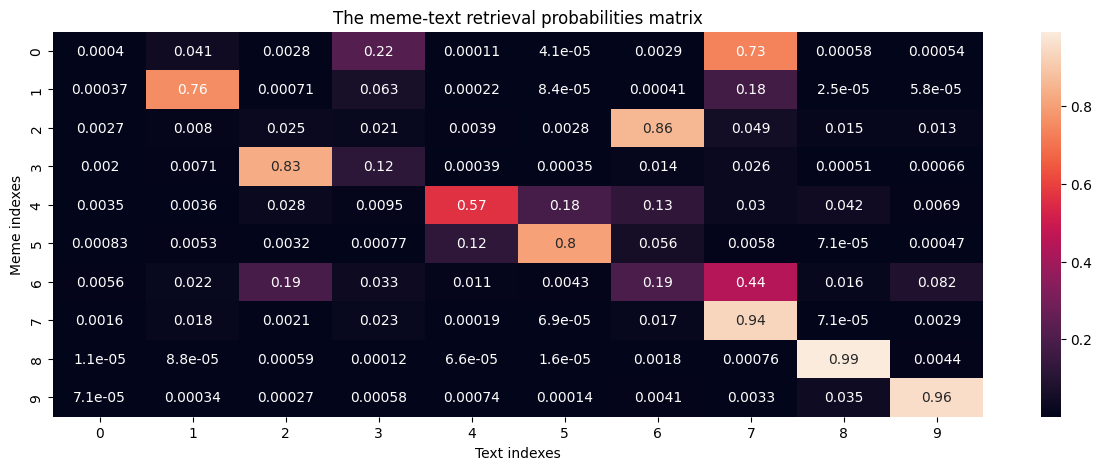

In [23]:
result = pd.DataFrame(result)
plt.figure(figsize=(15, 5))
sns.heatmap(result, annot=True) # fmt=".1f"
plt.xlabel('Text indexes')
plt.ylabel('Meme indexes')
plt.title('The meme-text retrieval probabilities matrix')
